### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 6
### Due: Friday, Oct 13 at 11:59 pm CT

## Problem 1

This week also we have only one problem worth 20 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw6_data.npy`. This is a (100 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

3) Compute sample mean for all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

4) Write a code to generate $100$ Jackknife datasets using the Jackknife method with one leave-off.  *DO NOT use the `astroML` code*. 

5) Compute sample mean for all $100$ Jackknife datasets to find the distribution of the sample mean. Plot a normalized histogram of these Jackknife means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

# 1.) Load data, compute mean and standard error

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data = np.load('../../homeworks/hw_data/hw6_data.npy')

measurements, sigma = data[:, 0], data[:, 1]

mean = np.mean(measurements)
error = np.sqrt(np.sum(sigma**2) / (len(measurements)**2))

print("The mean of the sample is:", mean)
print("The standard error for the sample mean is:", error)


The mean of the sample is: 3.937547512109005
The standard error for the sample mean is: 0.12989600766741974


# 2.) Generate 1000 boostrap realizations

In [21]:
import numpy as np

def bootstrap(data, num_resamples=1000):
    num_data_points = len(data)
    bootstrap_samples = []

    for _ in range(num_resamples):
        # Generate random indices with replacement
        indices = np.random.choice(num_data_points, size=num_data_points, replace=True)
        # Use the indices to select the resampled data
        resampled_data = data[indices]
        bootstrap_samples.append(resampled_data)
    return bootstrap_samples

bootstrap_samples = bootstrap(data, num_resamples=1000)

# 3.) Compute sample mean. Plot a normalized histogram of the means. Overplot a Gaussian pdf with the mean and std found in 1. Do they agree?

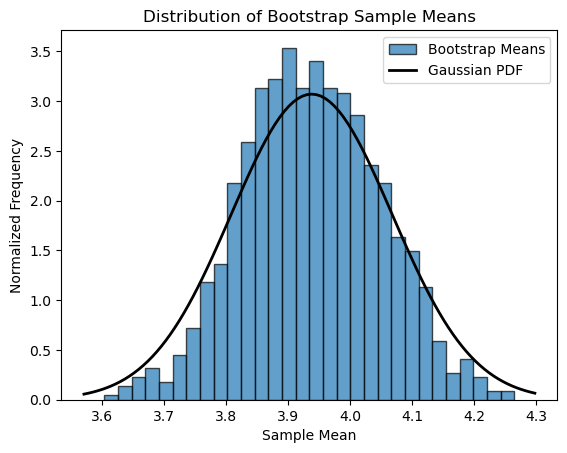

In [22]:
# Calculate the sample mean for each bootstrap sample
bootstrap_means = [np.mean(sample[:, 0]) for sample in bootstrap_samples]

# Plot a normalized histogram of bootstrap means
plt.hist(bootstrap_means, bins=30, density=True, edgecolor='black', alpha=0.7, label='Bootstrap Means')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, error)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian PDF')

plt.xlabel('Sample Mean')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Bootstrap Sample Means')
plt.legend()
plt.show()

In [23]:
# Do they agree?

print("The bootstrap mean is", np.mean(bootstrap_means))
print("The standard deviation of the bootstrap mean is", np.std(bootstrap_means))
print("\nThe means of the Gaussian vs bootstrap mean are close but theres a significant difference in their errors.")

The bootstrap mean is 3.937627757258863
The standard deviation of the bootstrap mean is 0.11129524186891208

The means of the Gaussian vs bootstrap mean are close but theres a significant difference in their errors.


# 4.) Generate 50 Jackknife datasets with one leave-off

In [24]:
# Get the number of data points
num_data_points = len(data)

# Initialize an empty list to store Jackknife samples
jackknife_samples = []

# Generate Jackknife datasets
for i in range(num_data_points):
    leave_one_out_data = np.delete(data, i, axis=0)
    jackknife_samples.append(leave_one_out_data)

# 5.) Compute sample mean for all 50 Jackknife datasets. Plot a normalized histogram of these Jackknife means. Overplot the Gaussian pdf. Do these agree?

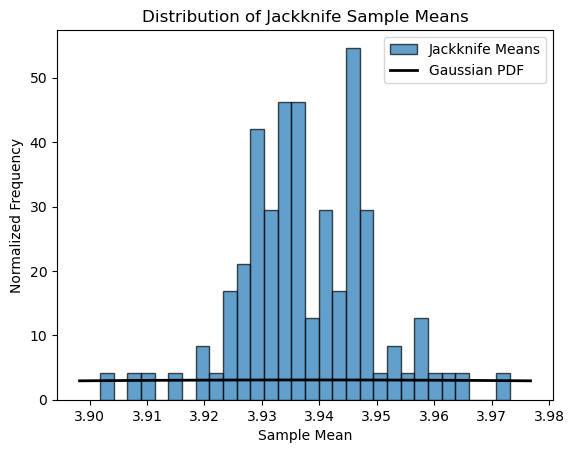

In [41]:
# Calculate the sample mean for each Jackknife sample
jackknife_means = [np.mean(sample[:, 0]) for sample in jackknife_samples]

# Plot Jackknife
plt.hist(jackknife_means, bins=30, density=True, edgecolor='black', alpha=0.7, label='Jackknife Means')

# Plot Gaussian
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, error)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian PDF')

plt.xlabel('Sample Mean')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Jackknife Sample Means')
plt.legend()
plt.show()

In [33]:
print("The mean for the Jackknife samples is:", np.mean(jackknife_means))
print("The standard deviation for the jackknife samples is:", np.std(jackknife_means))
print("\nOnce again, the sample mean agrees with the original Gaussian, but the standard deviation is way off, even further than before.")

The mean for the Jackknife samples is: 3.9375475121090044
The standard deviation for the jackknife samples is: 0.011623440454493603

Once again, the sample mean agrees with the original Gaussian, but the standard deviation is way off, even further than before.


The gaussian is a bit hard to see due to the magnitude of the frequency. I believe this is from an error in my Jackknife algorithm.